# **Project Title:** Dengue Outbreak Prediction in Dhaka<br/>

---

**Semester:** Spring'24<br/>
**Course Code:** CSE422<br/>
**Section:** 07

---

**Group no.:** 06<br/>
**Student1:** Sakib Rayhan Yeasin (22101667)<br/>
**Student2:** Shafaat Jamil Nakib (22101671)<br/>

# Importing Libraries

In [ ]:
# Dataset Handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scaling and Labeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



from sklearn.metrics import confusion_matrix

# Data Preprocessing

## Familiarizing with the Dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# importing the dataset
# df = pd.read_csv('/content/drive/MyDrive/My CSE422 Lab/Project/dataset with missing data.csv')
df = pd.read_csv('dataset with missing data.csv')

In [ ]:
df.head(10)

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0.0,0.0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0.0,1.0,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0.0,0.0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1.0,0.0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,NaN,0.0,Gendaria,Undeveloped,Building,Dhaka,0
5,Female,36,0,0.0,1.0,Dhanmondi,?,Other,Dhaka,0
6,Female,15,0,0.0,NaN,New Market,Undeveloped,Building,Dhaka,0
7,Male,26,0,0.0,0.0,New Market,Developed,Other,Dhaka,0
8,Female,31,0,0.0,1.0,Dhanmondi,?,Tinshed,Dhaka,0
9,Female,10,0,NaN,1.0,Sher-e-Bangla Nagar,Developed,Tinshed,Dhaka,0


In [ ]:
print("Dataset Description:")
df.describe()

Dataset Description:


,Age,NS1,IgG,IgM,Outcome
count,1000.000000,1000.000000,777.000000,875.000000,1000.000000
mean,35.924000,0.519000,0.527671,0.477714,0.533000
std,16.468437,0.499889,0.499555,0.499789,0.499159
min,8.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,1.000000,0.000000,1.000000
75%,50.000000,1.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(f"Shape of the dataset (Rows, Columns): {df.shape}")

Shape of the dataset (Rows, Columns): (1000, 10)


In [ ]:
print("Initial Features:")
for index, key in enumerate(df.keys()):
    print(f"{index+1}. {key}")

Initial Features:
1. Gender
2. Age
3. NS1
4. IgG
5. IgM
6. Area
7. AreaType
8. HouseType
9. District
10. Outcome


## Cleaning the Data

### Removing duplicate Datapoints / Instances

In [ ]:
#Checking for duplicates
print("Duplicate values:", df.duplicated().sum())

Duplicate values: 4


In [ ]:
# Removing duplicate instances
df = df.drop_duplicates()
print("Duplicates left:", df.duplicated().sum())
print(f"Shape of the dataset after removing the duplicate instances: {df.shape}")

Duplicates left: 0
Shape of the dataset after removing the duplicate instances: (996, 10)


<ipython-input-13-a472d212713b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Area', y='Count', data=area_counts, palette=sns.color_palette("Blues", len(area_counts)), edgecolor='black')


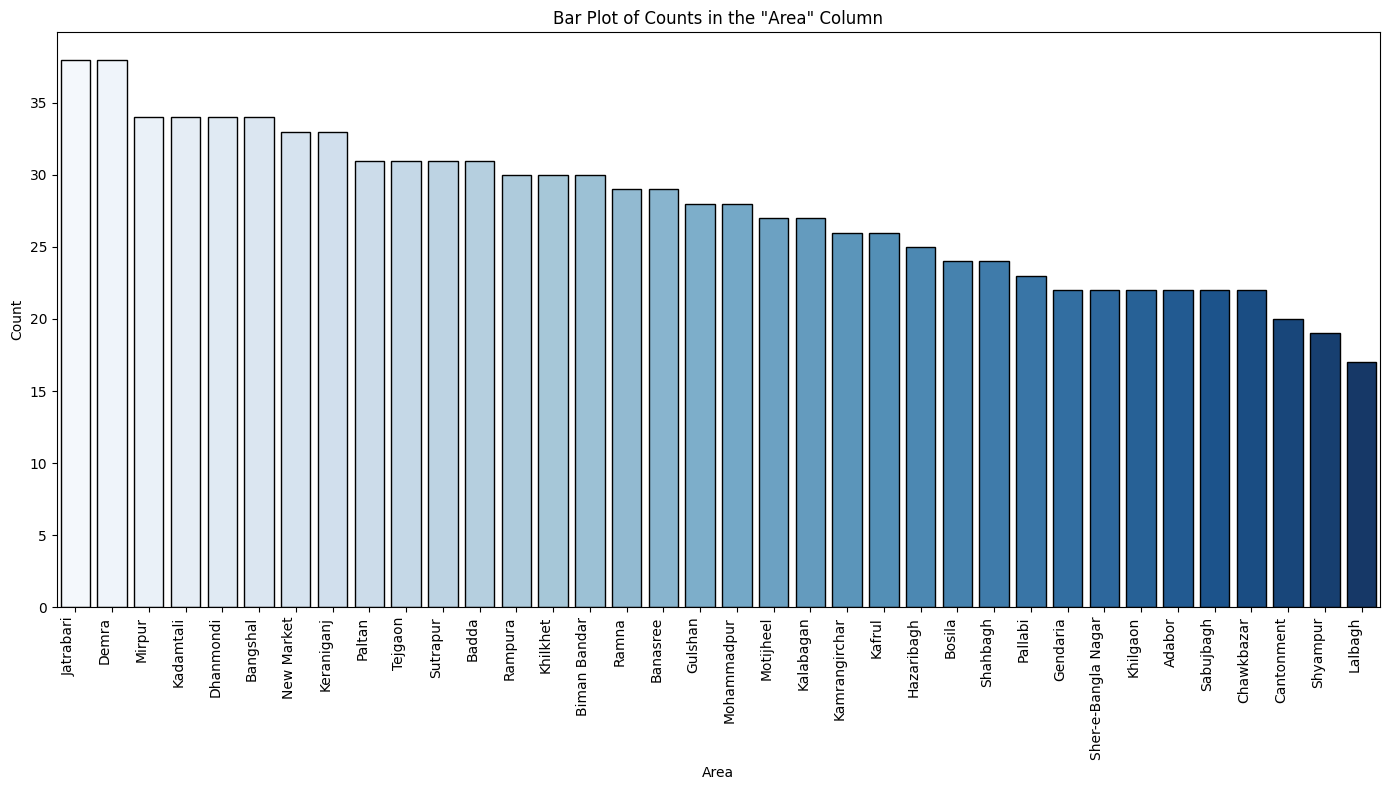

In [ ]:
area_counts = df['Area'].value_counts().reset_index()
area_counts.columns = ['Area', 'Count']

plt.figure(figsize=(14, 8))

sns.barplot(x='Area', y='Count', data=area_counts, palette=sns.color_palette("Blues", len(area_counts)), edgecolor='black')


# Adding titles and labels
plt.title('Bar Plot of Counts in the "Area" Column')
plt.xlabel('Area')
plt.ylabel('Count')

# Improve the x-axis labels
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-14-730a35e7e4ba>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HouseType', y='Count', data=housetype_counts, palette=palette, edgecolor='black')


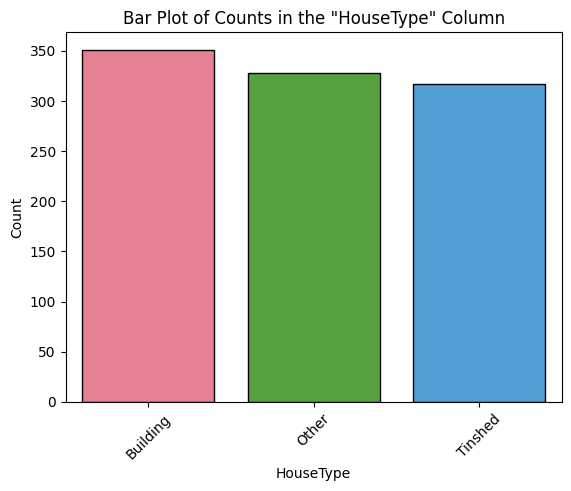

In [ ]:
housetype_counts = df['HouseType'].value_counts().reset_index()
housetype_counts.columns = ['HouseType', 'Count']

# Generate a palette with as many unique colors as there are house types
palette = sns.color_palette("husl", len(housetype_counts))

# Create a bar plot using seaborn with the generated palette
sns.barplot(x='HouseType', y='Count', data=housetype_counts, palette=palette, edgecolor='black')

# Adding titles and labels
plt.title('Bar Plot of Counts in the "HouseType" Column')
plt.xlabel('HouseType')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if necessary for better visibility

plt.show()

In [ ]:
areatype_counts = df['AreaType'].value_counts()
print("Count of each unique value in the 'AreaType' column:")
print(areatype_counts)

Count of each unique value in the 'AreaType' column:
AreaType
Developed      471
Undeveloped    470
?               55
Name: count, dtype: int64


### Handling Null Values

In [ ]:
# replacing '?' with np.nan
df.replace("?", np.nan, inplace = True)
# Checking the number null values
print("Number of null values in each column:")
df.isnull().sum()

Number of null values in each column:


Gender         0
Age            0
NS1            0
IgG          222
IgM          125
Area           0
AreaType      55
HouseType      0
District       0
Outcome        0
dtype: int64

In [ ]:
#checking the percentage of null values
df.isnull().mean() * 100

Gender        0.000000
Age           0.000000
NS1           0.000000
IgG          22.289157
IgM          12.550201
Area          0.000000
AreaType      5.522088
HouseType     0.000000
District      0.000000
Outcome       0.000000
dtype: float64

We found from our familirization steps that there are 3 features in the dataset having multiple NULL or missing values, namely:


1.   IgG (Numerical data)
2.   IgM (Numerical data)
3.  AreaType (Categorical data)

Among these features, IgG and IgM are numerical data, whereas AreaType is categorical data. Therefore, the we have to use different imputation methods for neumerical data and categorical data.




We have to check how much our data spreads out. This helps us understand the difference before and after we fill in missing values. If the spread is small, it's good. In regression, we're searching for patterns. If our data has less spread, our model works better. So, we want less spread or variance.

## Imputing

In [ ]:
# Checking value count before imputing the null values numerical features
print(df["IgG"].value_counts())
df["IgM"].value_counts()

IgG
1.0    410
0.0    364
Name: count, dtype: int64


IgM
0.0    455
1.0    416
Name: count, dtype: int64

### IgG, IgM: KNN Imputing (Best result)

In [ ]:
# create a copy of original IgG and IgM columns
df['Original_IgG'] = df['IgG'].copy()
df['Original_IgM'] = df['IgM'].copy()

# Creating a mask for missing values
missing_mask = df[['IgG', 'IgM']].isna()

# KNN imputer for numerical data
knn_imputer = KNNImputer(n_neighbors=15)
imputed_values = knn_imputer.fit_transform(df[['IgG', 'IgM']])

# Rounding the imputed values to ensure they are 0 or 1
imputed_values = np.round(imputed_values).astype(int)

# Assigning imputed values only to missing values
df.loc[missing_mask.any(axis=1), ['IgG', 'IgM']] = imputed_values[missing_mask.any(axis=1)]

# Now, ensure the values are still within 0 and 1 range
df['IgG'] = np.clip(df['IgG'], 0, 1)
df['IgM'] = np.clip(df['IgM'], 0, 1)

# Convert the values to integers
df['IgG'] = df['IgG'].astype(int)
df['IgM'] = df['IgM'].astype(int)

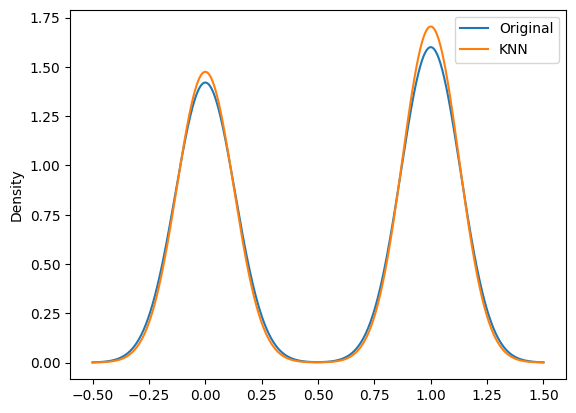

In [ ]:
df['Original_IgG'].plot(kind = "kde",label="Original")

df['IgG'].plot(kind = "kde",label = "KNN")


plt.legend()
plt.show()

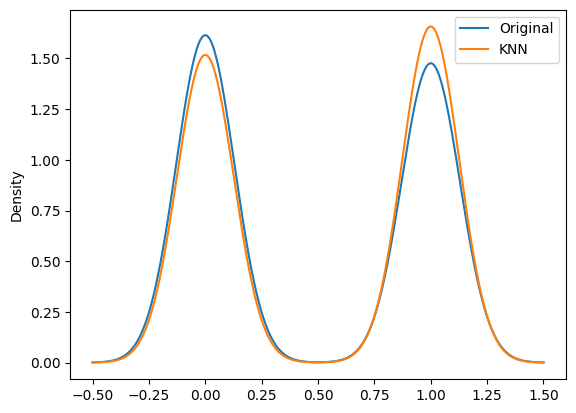

In [ ]:
df['Original_IgM'].plot(kind = "kde",label="Original")

df['IgM'].plot(kind = "kde",label = "KNN")


plt.legend()
plt.show()

**Comment about variance:** We can see that it KNN imputing with 15 nearest neighbours produces imputed values with very little variance.

### IgG, IgM: MICE [Iterative] (Good but not as good as KNN)

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Assuming df is your DataFrame and it's already imported

# # Create a copy of original IgG and IgM columns
# df['Original_IgG'] = df['IgG'].copy()
# df['Original_IgM'] = df['IgM'].copy()

# # Creating a mask for missing values
# missing_mask = df[['IgG', 'IgM']].isna()

# # Iterative imputer
# iterative_imputer = IterativeImputer(max_iter = 100, random_state=0)
# imputed_values = iterative_imputer.fit_transform(df[['IgG', 'IgM']])

# # Rounding the imputed values to ensure they are 0 or 1
# imputed_values = np.round(imputed_values).astype(int)

# # Assigning imputed values only to missing values
# df.loc[missing_mask.any(axis=1), ['IgG', 'IgM']] = imputed_values[missing_mask.any(axis=1)]

# # Now, ensure the values are still within 0 and 1 range
# df['IgG'] = np.clip(df['IgG'], 0, 1)
# df['IgM'] = np.clip(df['IgM'], 0, 1)

# # Convert the values to integers
# df['IgG'] = df['IgG'].astype(int)
# df['IgM'] = df['IgM'].astype(int)

# # Plotting the original and imputed distributions
# df['Original_IgG'].plot(kind="kde", label="Original")
# df['IgG'].plot(kind="kde", label="Iterative Imputation")

# plt.legend()
# plt.show()

# # Plotting the original and imputed distributions
# df['Original_IgM'].plot(kind="kde", label="Original")
# df['IgM'].plot(kind="kde", label="Iterative Imputation")

# plt.legend()
# plt.show()

### AreaType: Probabilistic Impute

**Cause for select this imputation method:** One of the most commonly used imputing technique is using the most dominant value of a property and using it for all the null values for that feature. However, this requires the frequency occurence of dominant value to be significantly more than other values. In cases where that is not true, using this method introduces significant biases in the overall success of the model.

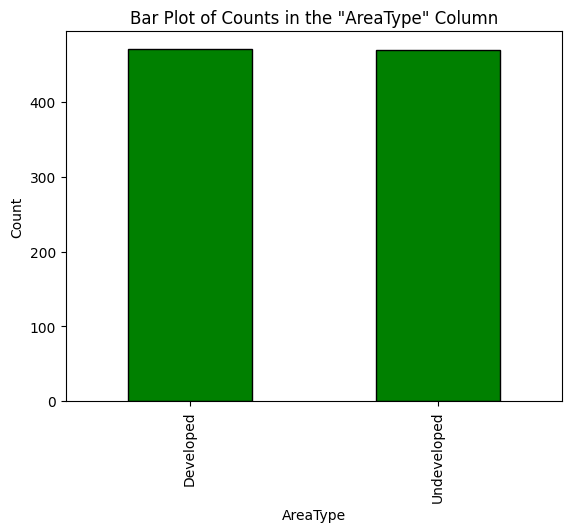

In [ ]:
areatype_counts = df['AreaType'].value_counts()
areatype_counts = areatype_counts[areatype_counts.index != '?']

# Now plot the filtered data
areatype_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Bar Plot of Counts in the "AreaType" Column')
plt.xlabel('AreaType')
plt.ylabel('Count')
plt.show()

It is clear from the above bar graph that among both values in AreaType column none are significantly more demoninant than the other. Moreover, filling all null values for this feature with 'Developed' would introduce noticable biases to the model. Therefore, 'most frequent' mothod is not suitable for this feature.

In [ ]:
# We set seed to have a consistent imputation result through multiple runs of the same code
np.random.seed(42)

# Calculate the frequency of each category
category_counts = df['AreaType'].value_counts(normalize=True)
print("Category Frequencies:\n", category_counts)

# Function to perform probabilistic imputation
def probabilistic_impute(series, category_counts):
    # Determine which entries are NaN
    is_missing = series.isnull()

    num_missing = is_missing.sum()

    # Generate random categories based on the distribution of existing values
    imputed_categories = np.random.choice(category_counts.index, size=num_missing, p=category_counts.values)
    # Fill in the missing values
    series[is_missing] = imputed_categories
    return series

# Apply the probabilistic imputation
df['Original_AreaType'] = df['AreaType']
df['AreaType'] = probabilistic_impute(df['AreaType'], category_counts)

Category Frequencies:
 AreaType
Developed      0.500531
Undeveloped    0.499469
Name: proportion, dtype: float64


<ipython-input-24-65327f0cd191>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[is_missing] = imputed_categories


In [ ]:
#
df['AreaType_encoded'] = df['AreaType'].map({'Developed': 1, 'Undeveloped': 0})
df['Original_AreaType_encoded'] = df['Original_AreaType'].map({'Developed': 1, 'Undeveloped': 0})
df.head(10)

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome,Original_IgG,Original_IgM,Original_AreaType,AreaType_encoded,Original_AreaType_encoded
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0,0.0,0.0,Undeveloped,0,0.0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0,0.0,1.0,Developed,1,1.0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0,0.0,0.0,Undeveloped,0,0.0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1,1.0,0.0,Developed,1,1.0
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0,NaN,0.0,Undeveloped,0,0.0
5,Female,36,0,0,1,Dhanmondi,Developed,Other,Dhaka,0,0.0,1.0,NaN,1,NaN
6,Female,15,0,0,1,New Market,Undeveloped,Building,Dhaka,0,0.0,NaN,Undeveloped,0,0.0
7,Male,26,0,0,0,New Market,Developed,Other,Dhaka,0,0.0,0.0,Developed,1,1.0
8,Female,31,0,0,1,Dhanmondi,Undeveloped,Tinshed,Dhaka,0,0.0,1.0,NaN,0,NaN
9,Female,10,0,1,1,Sher-e-Bangla Nagar,Developed,Tinshed,Dhaka,0,NaN,1.0,Developed,1,1.0


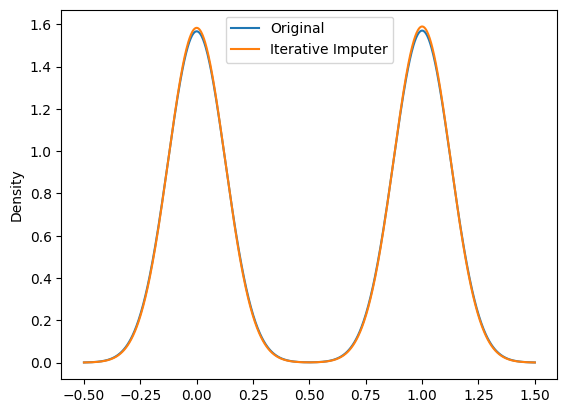

In [ ]:
df['Original_AreaType_encoded'].plot(kind = "kde",label="Original")

df['AreaType_encoded'].plot(kind = "kde",label = "Iterative Imputer")


plt.legend()
plt.show()

Finally, here are the count of values for the features where null values existed before imputation.

In [ ]:
df['AreaType_encoded'].value_counts()

AreaType_encoded
1    499
0    497
Name: count, dtype: int64

In [ ]:
print(df["IgG"].value_counts())
df["IgM"].value_counts()

IgG
1    534
0    462
Name: count, dtype: int64


IgM
1    520
0    476
Name: count, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].replace({'male': 1, 'Male': 1, 'female': 0, 'Female': 0})

In [ ]:
# Before one hot encoding we need to remove unnecessary columns
df.drop(['Original_IgG', 'Original_IgM', 'AreaType', 'Original_AreaType', 'Original_AreaType_encoded'], axis = 1, inplace = True)
df.head(5)

,Gender,Age,NS1,IgG,IgM,Area,HouseType,District,Outcome,AreaType_encoded
0,0,45,0,0,0,Mirpur,Building,Dhaka,0,0
1,1,17,0,0,1,Chawkbazar,Building,Dhaka,0,1
2,0,29,0,0,0,Paltan,Other,Dhaka,0,0
3,0,63,1,1,0,Motijheel,Other,Dhaka,1,1
4,1,22,0,0,0,Gendaria,Building,Dhaka,0,0


# Data Visualization

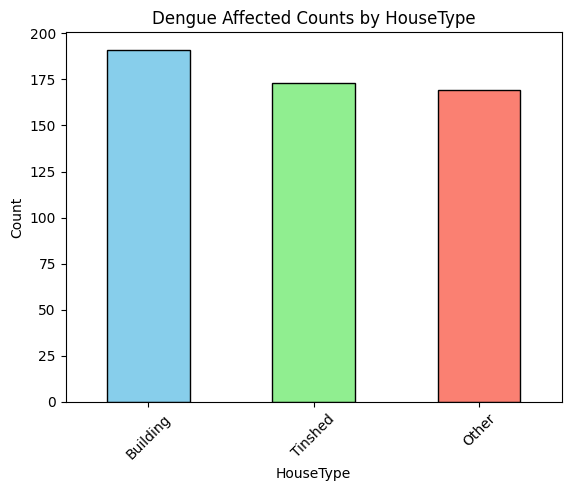

In [ ]:
dengue_affected_df = df[df['Outcome'] == 1]

# Group by 'HouseType' and count the dengue cases
houseType_counts = dengue_affected_df['HouseType'].value_counts()

colors = ['skyblue', 'lightgreen', 'salmon']

# Create a bar plot for dengue cases by house type
houseType_counts.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Dengue Affected Counts by HouseType')
plt.xlabel('HouseType')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


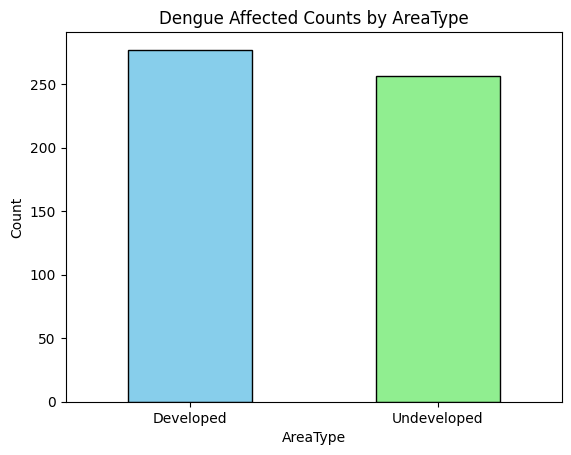

In [ ]:
dengue_affected_df = df[df['Outcome'] == 1]

# Get counts of dengue cases by AreaType_encoded
areatype_counts = dengue_affected_df['AreaType_encoded'].value_counts().sort_index()

labels = ['Developed', 'Undeveloped']

colors = ['skyblue', 'lightgreen']

# Create a bar plot for dengue cases by AreaType
areatype_counts.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Dengue Affected Counts by AreaType')
plt.xlabel('AreaType')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

plt.show()

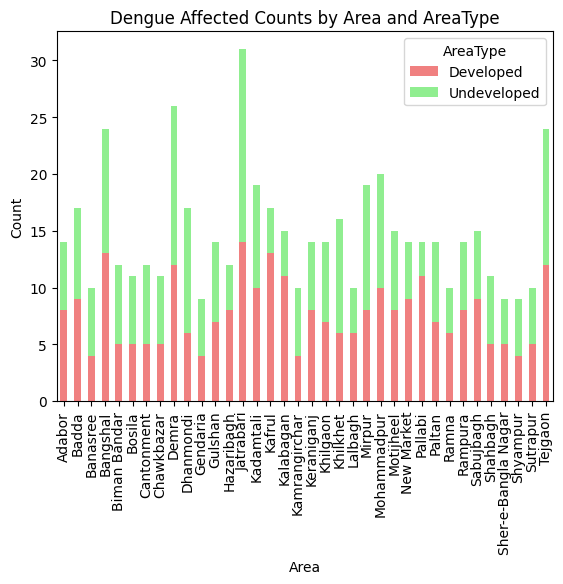

In [ ]:
dengue_affected_df = df[df['Outcome'] == 1]
area_areaType_counts = dengue_affected_df.groupby(['Area', 'AreaType_encoded']).size().unstack()
area_areaType_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Dengue Affected Counts by Area and AreaType')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='AreaType', labels=['Developed', 'Undeveloped'], loc='upper right')
plt.show()

Here we can see that Jatrabari has the highest number of dengue patients in despite being developed.W can also estimate that the areas namely Jatrabari, Bongshal, Khilkhet and Demra have unhygienic environments.

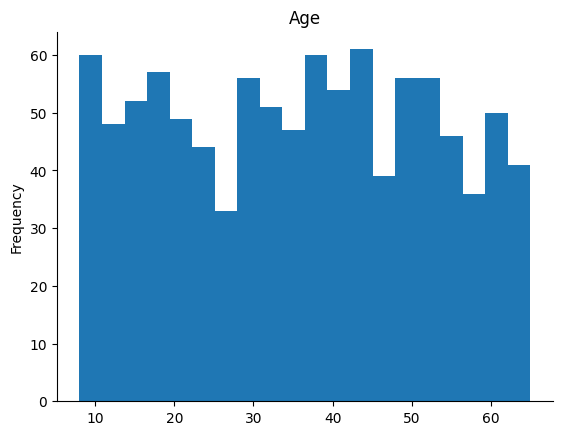

In [ ]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Encoding

## One-Hot

In [ ]:
df_copy = df.copy()

# Use one-hot encoding for the specified columns
df_copy = pd.get_dummies(df_copy, columns=['Area', 'District', 'HouseType'], prefix=['Area', 'District', 'HouseType'])

# Convert boolean values to integers (1s and 0s)
df_copy = df_copy.astype(int)

print("DataFrame with one-hot encoding (1s and 0s):")
df_copy

DataFrame with one-hot encoding (1s and 0s):


,Gender,Age,NS1,IgG,IgM,Outcome,AreaType_encoded,Area_Adabor,Area_Badda,Area_Banasree,...,Area_Sabujbagh,Area_Shahbagh,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,District_Dhaka,HouseType_Building,HouseType_Other,HouseType_Tinshed
0,0,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,17,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,63,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,16,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
996,1,41,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
997,1,45,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
998,0,19,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## Ordinal

In [ ]:
# # Create a copy of the DataFrame (optional but recommended)
# df_copy = df.copy()  # Avoid modifying the original DataFrame

# # Create an instance of LabelEncoder for each column
# columns_to_encode = ['Area', 'District', 'HouseType']
# encoders = {}  # Dictionary to store encoders for each column
# for col in columns_to_encode:
#     encoders[col] = LabelEncoder()

# # Apply encoding to each column
# for col in columns_to_encode:
#     df_copy[col] = encoders[col].fit_transform(df_copy[col])

# print("Dataset with ordinal encoding:")
# df_copy


# Scaling: Normalize

We decided to use normalized scaling instead of standardized scaling because normalized scaling brings the values into the range from 0 to 1.

In [ ]:
# MinMaxScaler normalization
scaler = MinMaxScaler()
scaler.fit(df_copy)
df_scaled = scaler.transform(df_copy)

# Convert NumPy array to DataFrame with original column names
column_names = df_copy.columns
df_scaled = pd.DataFrame(df_scaled, columns=column_names)
df_scaled

,Gender,Age,NS1,IgG,IgM,Outcome,AreaType_encoded,Area_Adabor,Area_Badda,Area_Banasree,...,Area_Sabujbagh,Area_Shahbagh,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,District_Dhaka,HouseType_Building,HouseType_Other,HouseType_Tinshed
0,0.0,0.649123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.157895,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.964912,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.245614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,0.0,0.140351,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
992,1.0,0.578947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
993,1.0,0.649123,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
994,0.0,0.192982,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


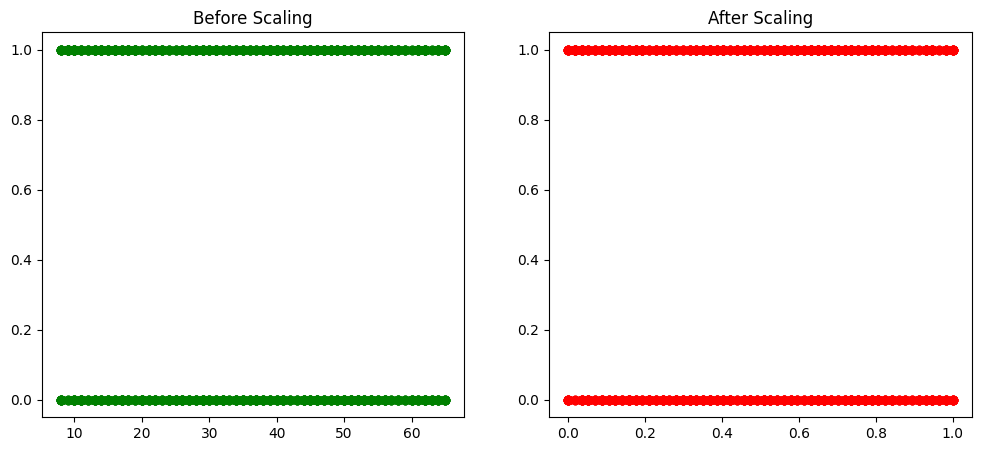

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(df_copy['Age'], df_copy['Outcome'], c = "green")
ax1.set_title("Before Scaling")
ax2.scatter(df_scaled['Age'], df_scaled['Outcome'], c = "red")
ax2.set_title("After Scaling")
plt.show()

**Successful scaling:**
The plots above suggests that the scaling was successful because we can see the features remain identical before and after scaling.

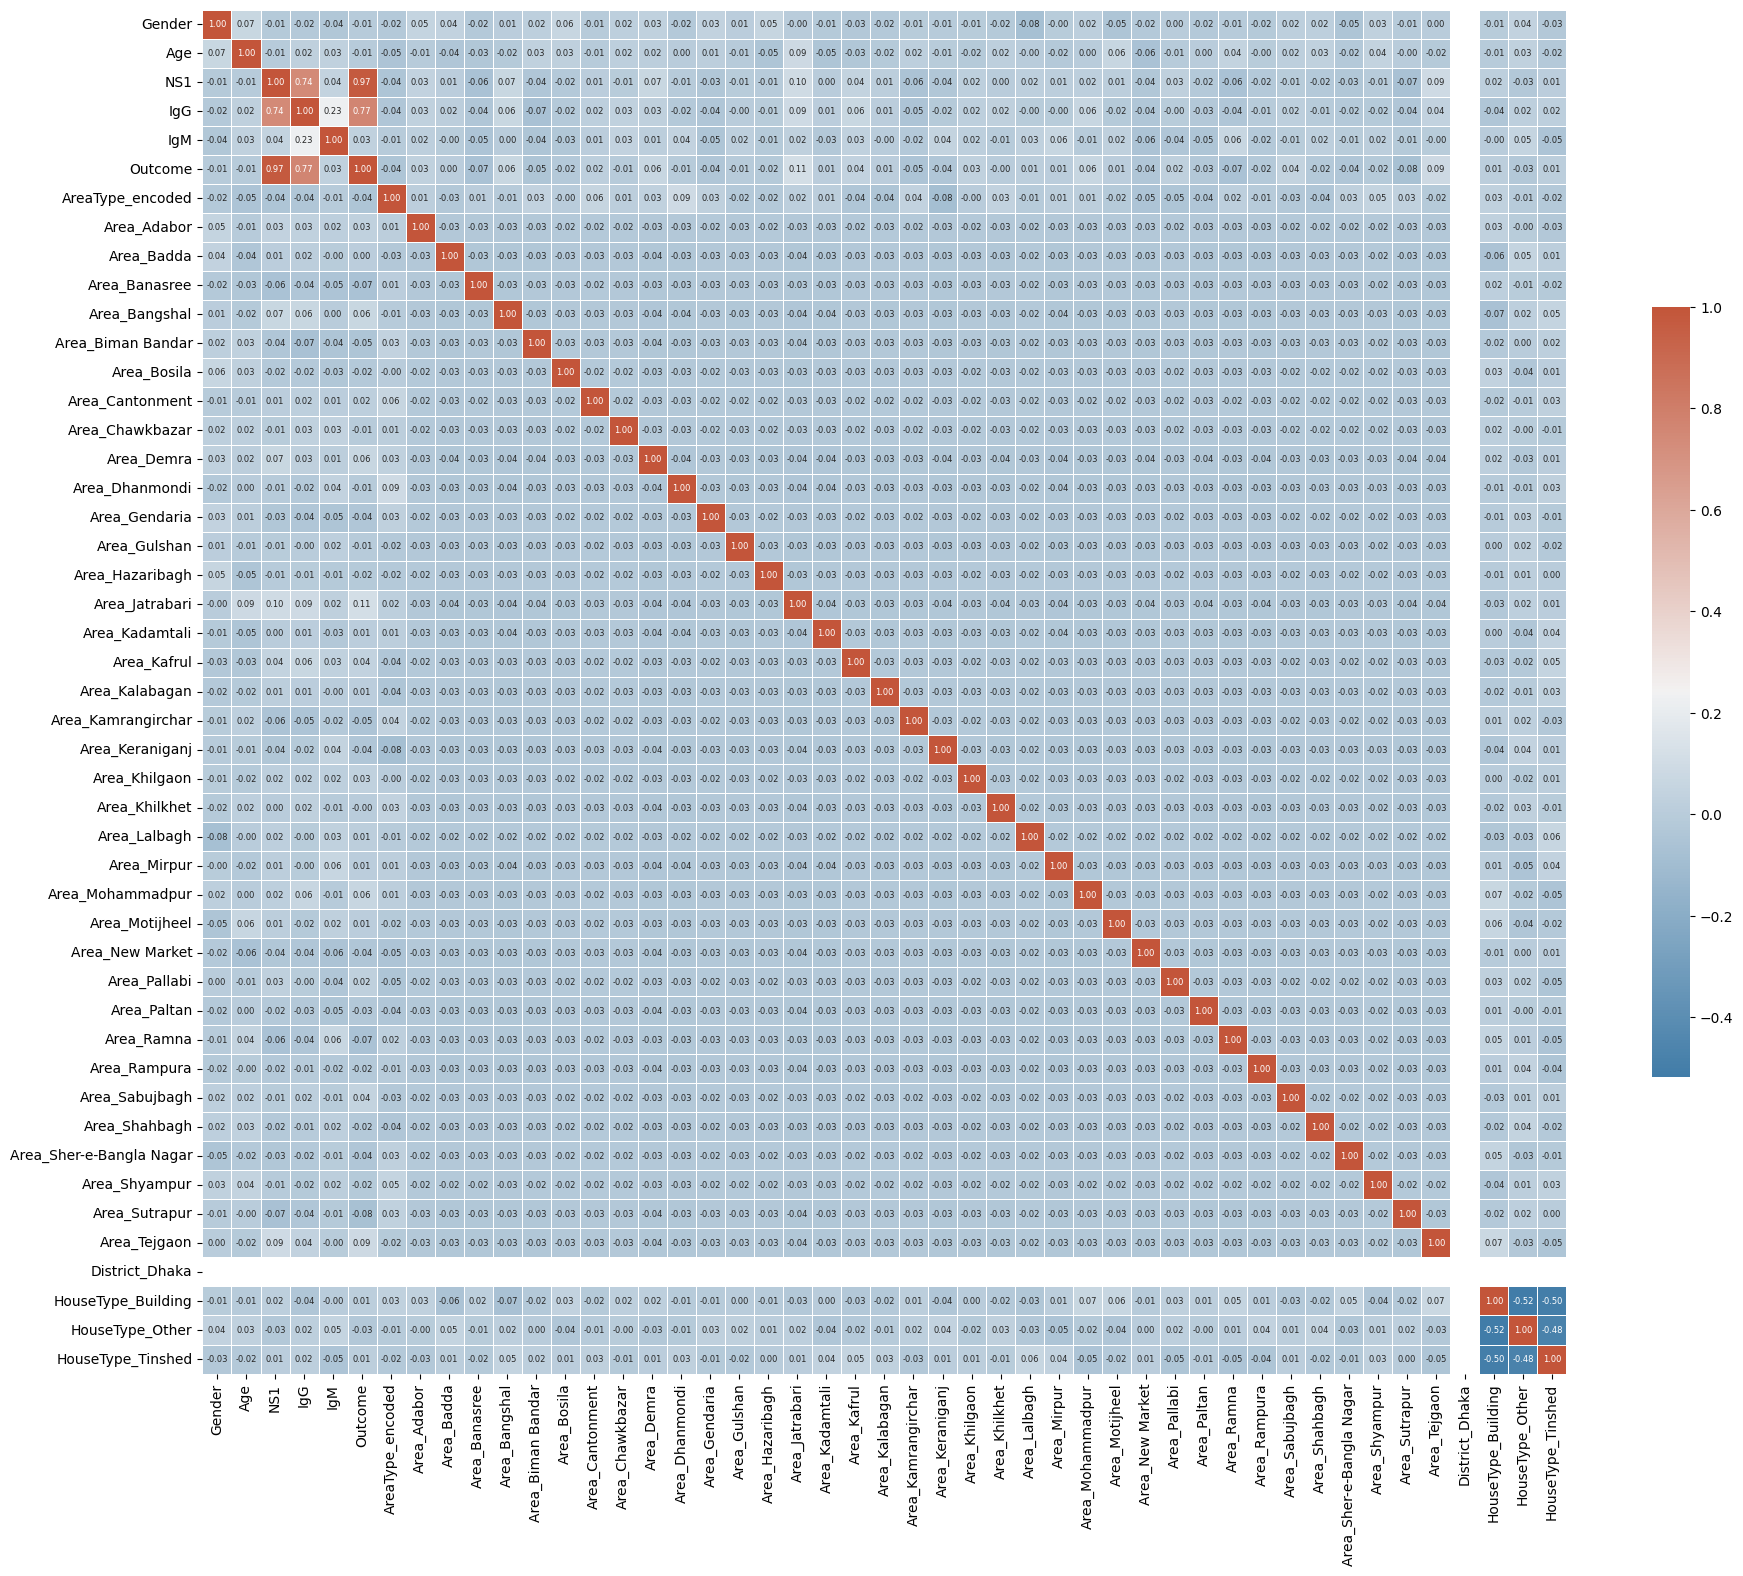

In [ ]:
df_corr = df_scaled.corr()

plt.figure(figsize=(22, 20))

cmap = sns.diverging_palette(240, 20, as_cmap=True)

sns.heatmap(df_corr, cmap=cmap, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 6})

plt.show()

Based on the correlational analysis, we can see and NS1 and IgG are quite strongly (0.74) correlated. Thefore, we can remove one of them.

* In this case we decided to remove IgG results as NS1 is cosidered primary test for dengue and therefore is more relavant.

In addition, we are also going to remove the column 'District' this column only contains one distinct value, which is 'Dhaka'.

In [ ]:
df_scaled.drop(['IgG', 'District_Dhaka'], axis=1)

,Gender,Age,NS1,IgM,Outcome,AreaType_encoded,Area_Adabor,Area_Badda,Area_Banasree,Area_Bangshal,...,Area_Rampura,Area_Sabujbagh,Area_Shahbagh,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,HouseType_Building,HouseType_Other,HouseType_Tinshed
0,0.0,0.649123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.157895,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.964912,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.245614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,0.0,0.140351,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
992,1.0,0.578947,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
993,1.0,0.649123,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
994,0.0,0.192982,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Dataset spliting

In [ ]:
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

1. Logistic Regression
2. Decision Trees
3. Naive Bayes

4. K-Nearest Neighbors (KNN)

* **Classification report:** precision, recall, and F1-score\
Precision = True Positives / (True Positives + False Positives)\
Recall = True Positives / (True Positives + False Negatives)\
F1-score = 2 * (Precision * Recall) / (Precision + Recall)

## Model 1: Logistic Regression

Accuracy: 0.9933
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       123
         1.0       1.00      0.99      0.99       176

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



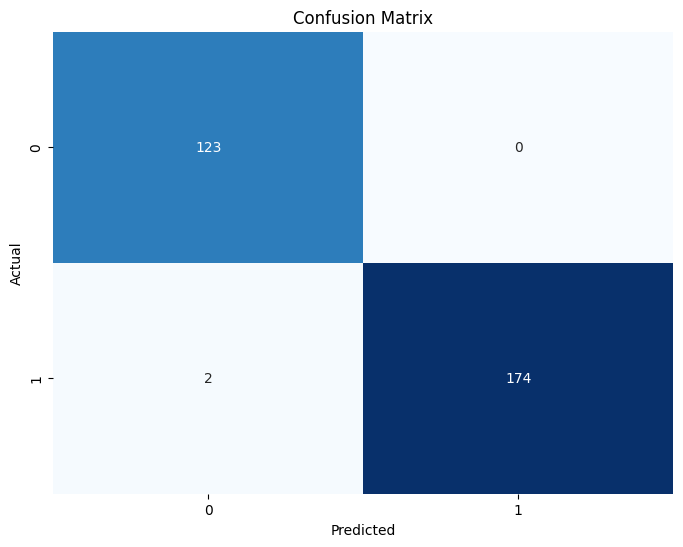

In [ ]:
log_model = LogisticRegression()

# Fit the model on the training data
log_model.fit(X_train, y_train)

log_y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, log_y_pred)
classification_report_result = classification_report(y_test, log_y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_result)

conf_matrix = confusion_matrix(y_test, log_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model 2: Decision Trees

Decision Tree Accuracy: 0.9967
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       123
         1.0       0.99      1.00      1.00       176

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



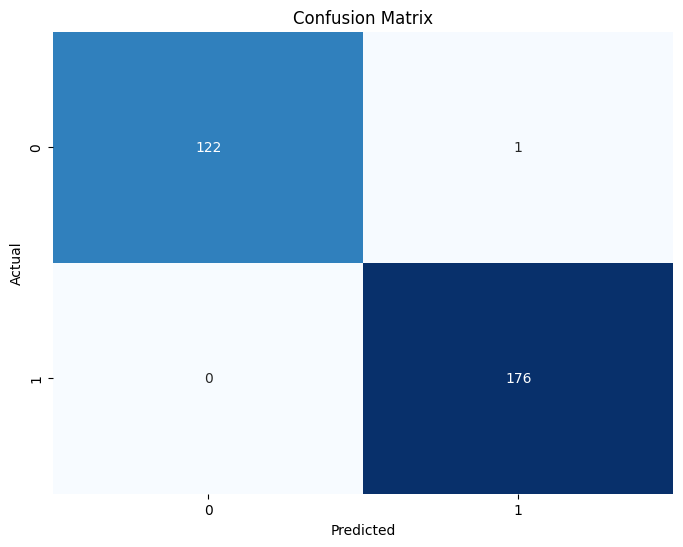

In [ ]:
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

# Calculate accuracy and classification report
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_classification_report = classification_report(y_test, dt_y_pred)

# Print results
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("Decision Tree Classification Report:")
print(dt_classification_report)

conf_matrix = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Model 3: Naive Bayes

Naive Bayes Accuracy: 0.9699
Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       123
         1.0       0.96      0.99      0.97       176

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



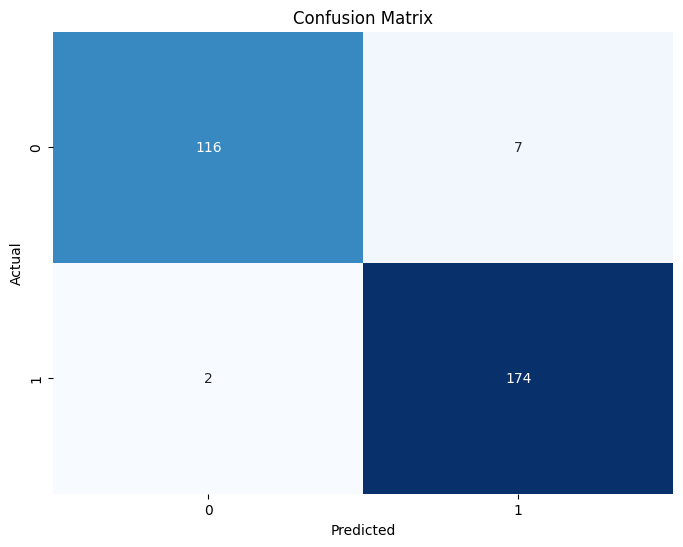

In [ ]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_y_pred = nb_model.predict(X_test)

# Calculate accuracy and classification report
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_classification_report = classification_report(y_test, nb_y_pred)

# Print results
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print("Naive Bayes Classification Report:")
print(nb_classification_report)

conf_matrix = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Model 4: K-Nearest Neighbors (KNN)


KNN Accuracy: 0.9933
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       123
         1.0       1.00      0.99      0.99       176

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



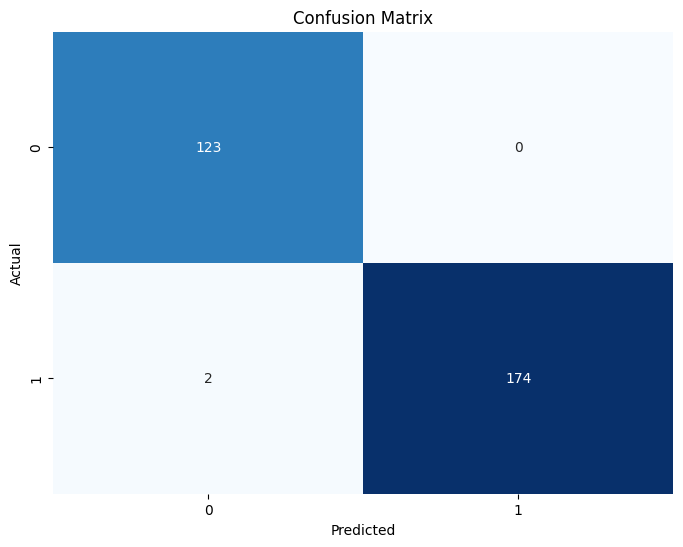

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

knn_y_pred = knn_model.predict(X_test)

# Calculate accuracy and classification report
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_classification_report = classification_report(y_test, knn_y_pred)

# Print results
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print("KNN Classification Report:")
print(knn_classification_report)

conf_matrix = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Models Comparison

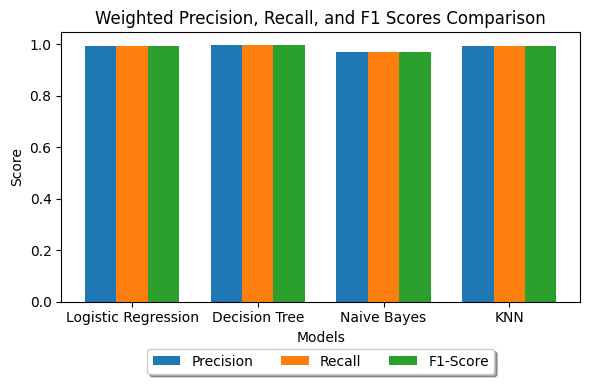

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define your models here (same as your previous code)
log_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train each model and store the weighted scores
model_names = ["Logistic Regression", "Decision Tree", "Naive Bayes", "KNN"]
precisions = []
recalls = []
f1_scores = []

for model, name in zip([log_model, dt_model, nb_model, knn_model], model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    weighted_scores = report["weighted avg"]
    precisions.append(weighted_scores["precision"])
    recalls.append(weighted_scores["recall"])
    f1_scores.append(weighted_scores["f1-score"])

# Create the bar plot
index = range(len(model_names))
width = 0.25  # Adjust bar width as needed

plt.figure(figsize=(6, 4))
plt.bar(index, precisions, width, label="Precision")
plt.bar([i + width for i in index], recalls, width, label="Recall")
plt.bar([i + 2*(width) for i in index], f1_scores, width, label="F1-Score")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks([i + width for i in index], model_names)
plt.title('Weighted Precision, Recall, and F1 Scores Comparison')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.tight_layout()
plt.show()
